# Covid Diagnosis with Ensemble ML models

## Data Collection

In [1]:
from google.colab import drive, files
import os
import pickle
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Dataset"

In [ ]:
! cd /content/drive/MyDrive/Dataset/

In [ ]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

In [ ]:
! unzip covid19-radiography-database

In [ ]:
if os.path.isdir('data/train/covid') is False:
  os.makedirs('data/train/normal')
  os.makedirs('data/train/covid')
  os.makedirs('data/test/normal')
  os.makedirs('data/test/covid')
  os.makedirs('data/valid/normal')
  os.makedirs('data/valid/covid')

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/COVID-19_Radiography_Dataset/COVID')

In [ ]:
for c in random.sample(glob.glob('COVID-*'), 2531):
  shutil.move(c, '../../data/train/covid')

for c in random.sample(glob.glob('COVID-*'), 723):
  shutil.move(c, '../../data/valid/covid')

for c in random.sample(glob.glob('COVID-*'), 362):
  shutil.move(c, '../../data/test/covid')

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/COVID-19_Radiography_Dataset/Normal')

In [ ]:
for c in random.sample(glob.glob('Normal-*'), 2531):
  shutil.move(c, '../../data/train/normal')

for c in random.sample(glob.glob('Normal-*'), 723):
  shutil.move(c, '../../data/valid/normal')

for c in random.sample(glob.glob('Normal-*'), 362):
  shutil.move(c, '../../data/test/normal')

## Convolutional Neural Network

In [3]:
os.chdir('/content/drive/My Drive/Dataset/')

In [4]:
train_path = '/content/drive/My Drive/Dataset/data/train'
valid_path = '/content/drive/My Drive/Dataset/data/valid'
test_path =  '/content/drive/My Drive/Dataset/data/test'

In [5]:
train_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=train_path, target_size=(299, 299), classes=['covid','normal'])
valid_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=valid_path, target_size=(299, 299), classes=['covid','normal'])
test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(directory=test_path, target_size=(299, 299), classes=['covid','normal'], shuffle=False)

Found 5062 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
Found 724 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(299,299,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 128)     36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 147, 147, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                    

In [ ]:
model.fit(
    x=train_gen,
    validation_data=valid_gen,
    epochs=50)

Epoch 1/50
159/159 [==============================] - 1291s 8s/step - loss: 0.6871 - accuracy: 0.5603 - val_loss: 0.6320 - val_accuracy: 0.6971
Epoch 2/50
159/159 [==============================] - 124s 781ms/step - loss: 0.5734 - accuracy: 0.7049 - val_loss: 0.4983 - val_accuracy: 0.7898
Epoch 3/50
159/159 [==============================] - 124s 781ms/step - loss: 0.4212 - accuracy: 0.8242 - val_loss: 0.3182 - val_accuracy: 0.8700
Epoch 4/50
159/159 [==============================] - 124s 781ms/step - loss: 0.3474 - accuracy: 0.8609 - val_loss: 0.2627 - val_accuracy: 0.9025
Epoch 5/50
159/159 [==============================] - 124s 781ms/step - loss: 0.2733 - accuracy: 0.8888 - val_loss: 0.2251 - val_accuracy: 0.9225
Epoch 6/50
159/159 [==============================] - 124s 780ms/step - loss: 0.2461 - accuracy: 0.9038 - val_loss: 0.2234 - val_accuracy: 0.9122
Epoch 7/50
159/159 [==============================] - 124s 780ms/step - loss: 0.2021 - accuracy: 0.9226 - val_loss: 0.1920 - v

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
if os.path.isdir('data/dataframes') is False:
  os.makedirs('data/dataframes')

if os.path.isdir('data/models') is False:
  os.makedirs('data/models')

if os.path.isdir('data/plots') is False:
  os.makedirs('data/plots')

In [ ]:
metrics.to_csv('data/dataframes/metrics.csv', index=False)
model.save('data/models/cnn_model.h5')

In [ ]:
# files.download('data/dataframes/metrics.csv')
# files.download('data/models/cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics = pd.read_csv('data/dataframes/metrics.csv')

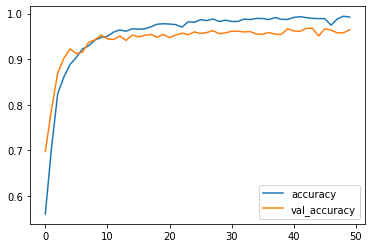

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

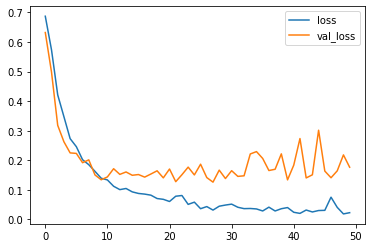

In [ ]:
metrics[['loss','val_loss']].plot()

In [6]:
cnn_model = load_model('data/models/cnn_model.h5')

In [ ]:
test_gen.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
preds = cnn_model.predict(x=test_gen)
print(classification_report(y_true= test_gen.classes, y_pred=np.argmax(preds, axis=-1), digits=4,labels=[0,1], target_names=['Covid', 'Normal']))

              precision    recall  f1-score   support

       Covid     0.9749    0.9669    0.9709       362
      Normal     0.9671    0.9751    0.9711       362

    accuracy                         0.9710       724
   macro avg     0.9710    0.9710    0.9710       724
weighted avg     0.9710    0.9710    0.9710       724



Text(0.5, 1.0, 'CNN')

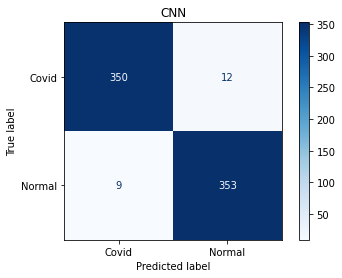

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   test_gen.classes, np.argmax(preds,axis=1), labels=[0,1], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("CNN")

## Visualizing intermediate activations

In [26]:
imgs, labels = next(train_gen)
img_tensor = imgs[0]
img_tensor.shape

(299, 299, 3)

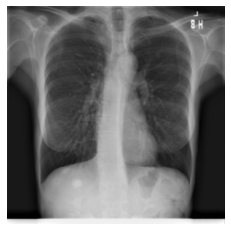

In [19]:
plt.axis("off")
plt.imshow(img_tensor)
plt.show()

In [37]:
layer_outputs = [layer.output for layer in cnn_model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = keras.Model(inputs=cnn_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [38]:
activations = activation_model.predict(np.expand_dims(image.img_to_array(img_tensor), axis=0))

In [39]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 297, 297, 32)


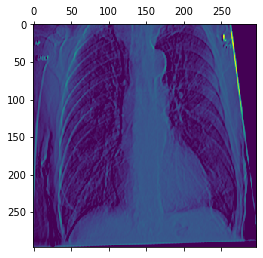

In [40]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

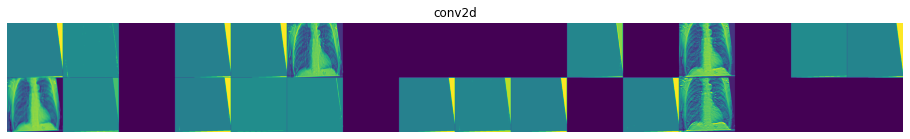

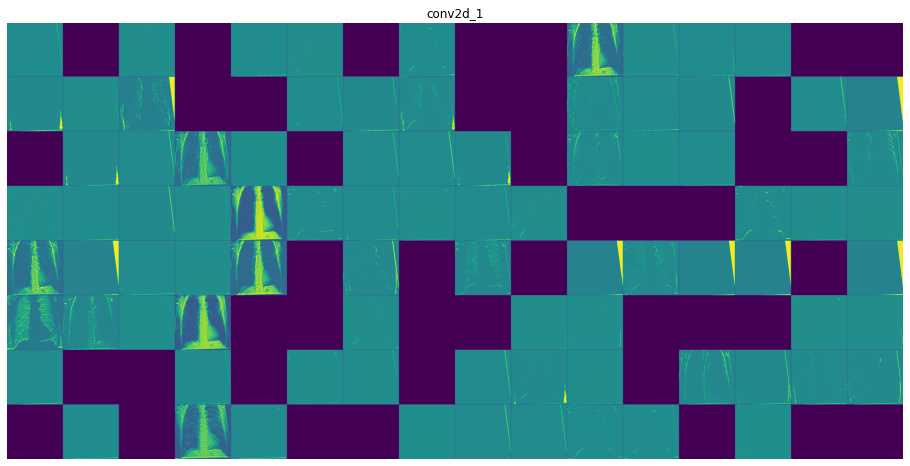

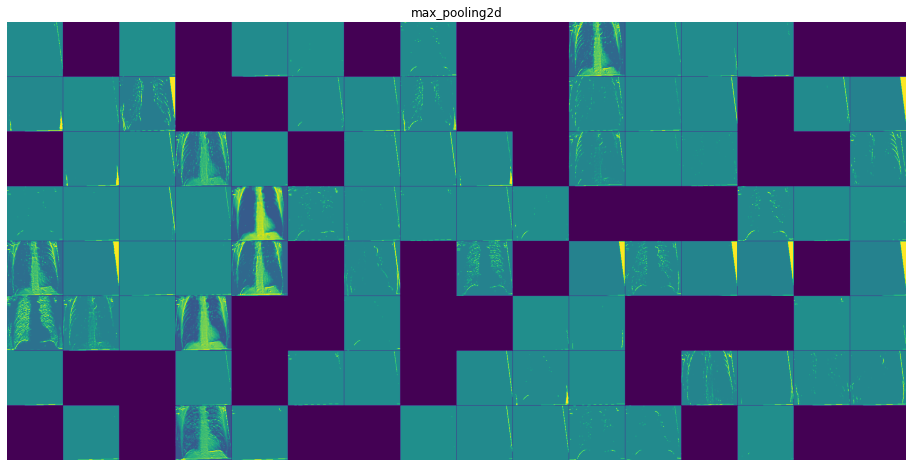

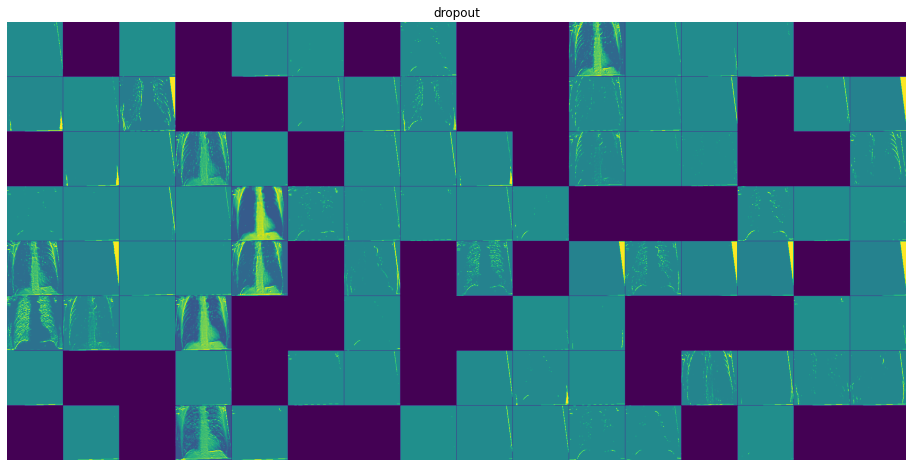

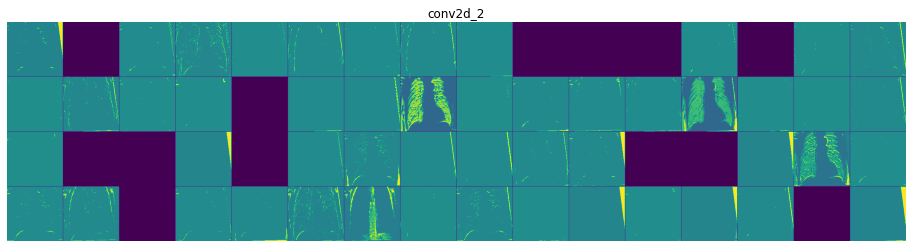

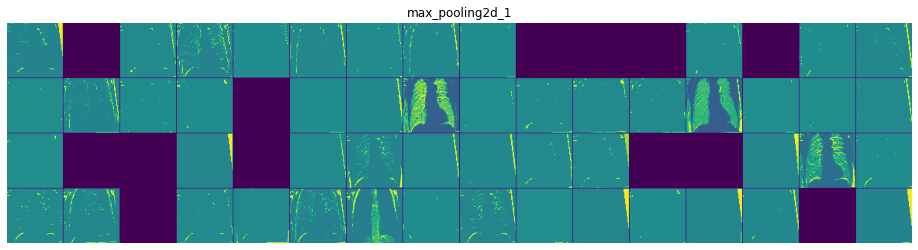

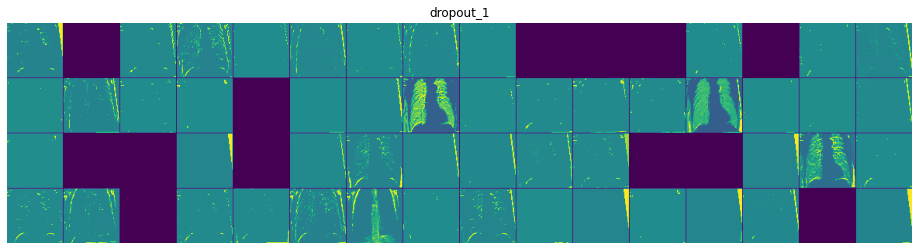

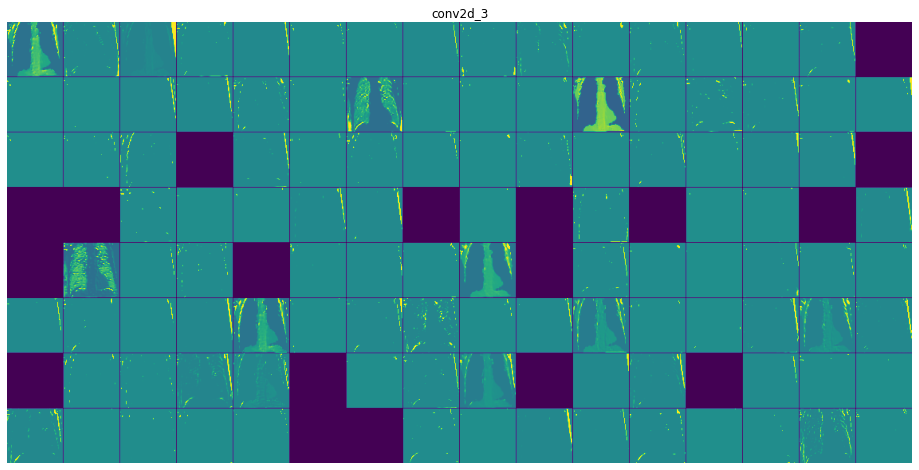

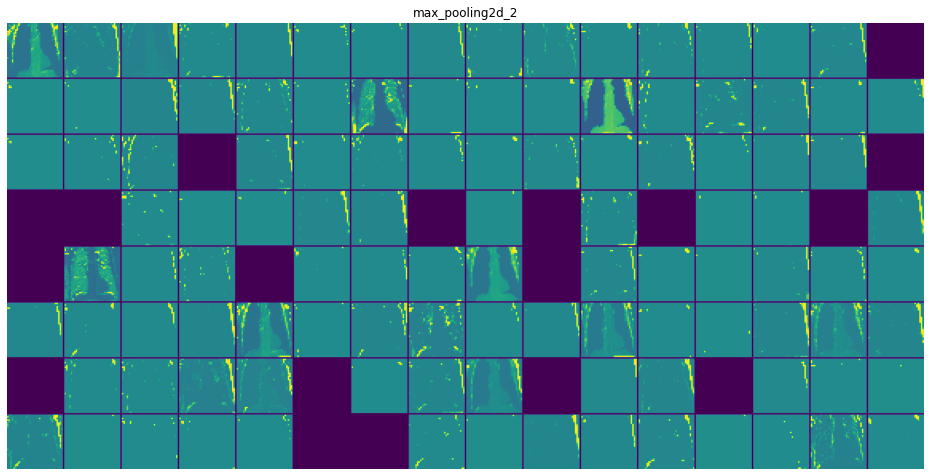

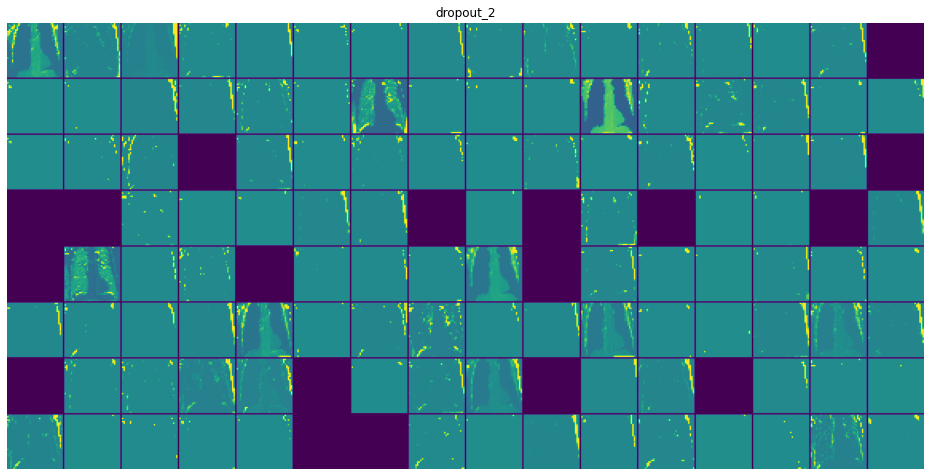

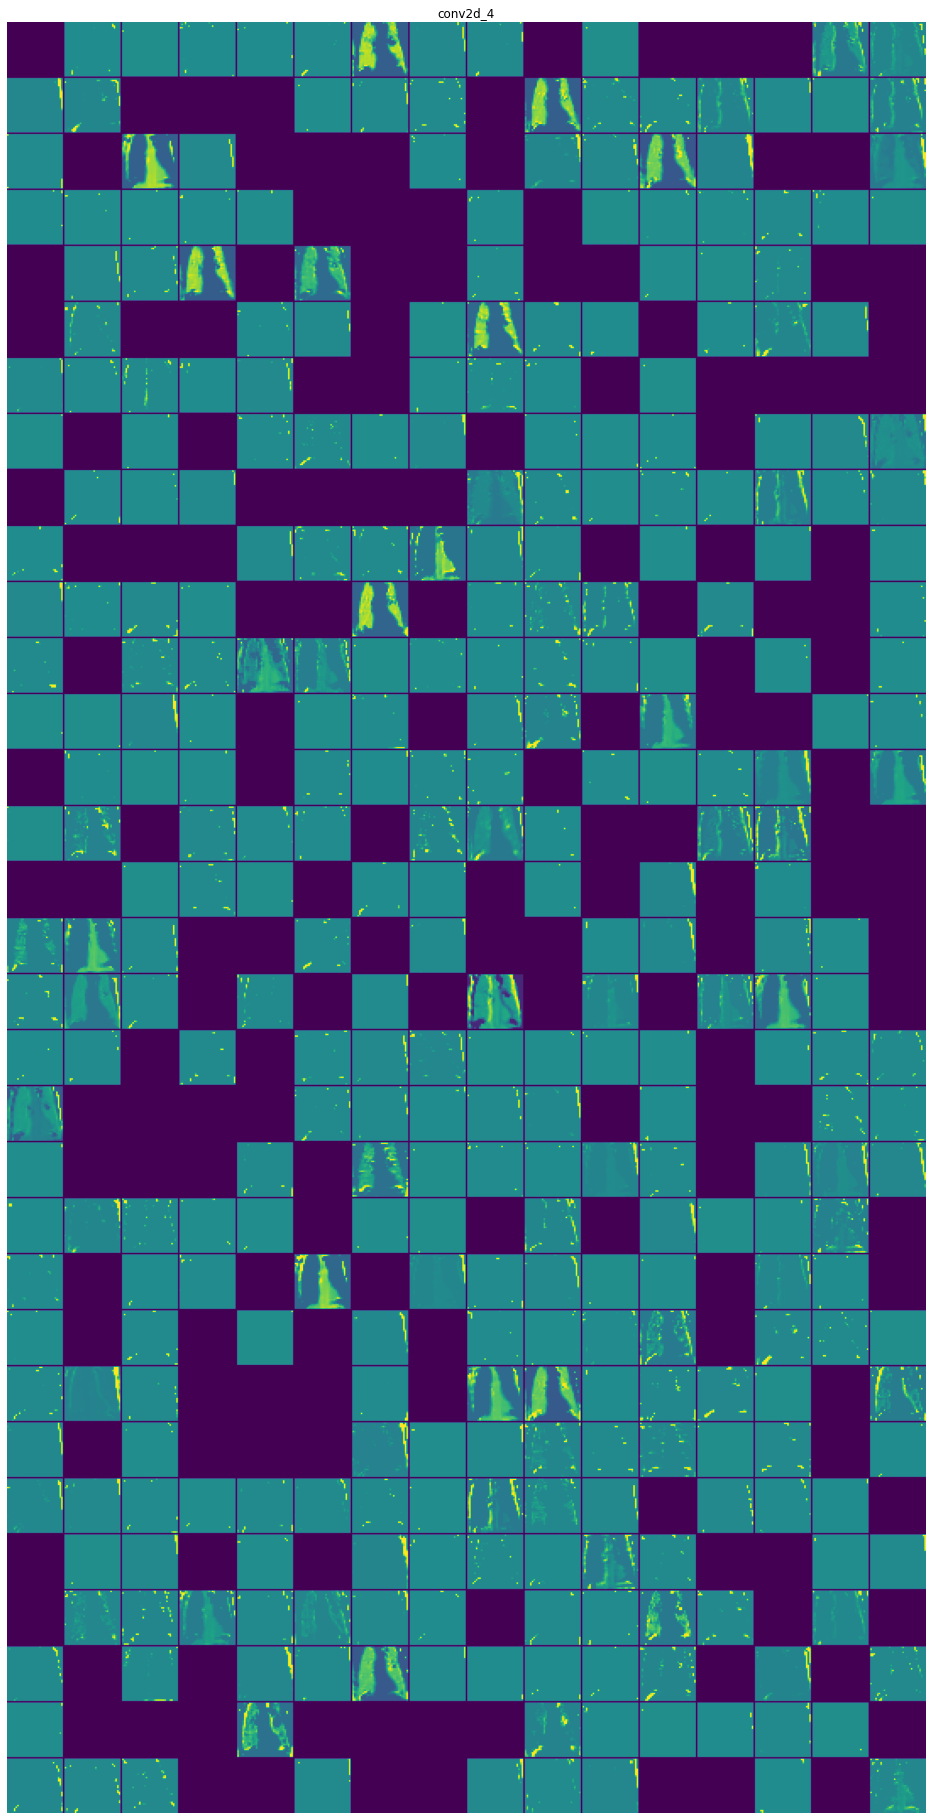

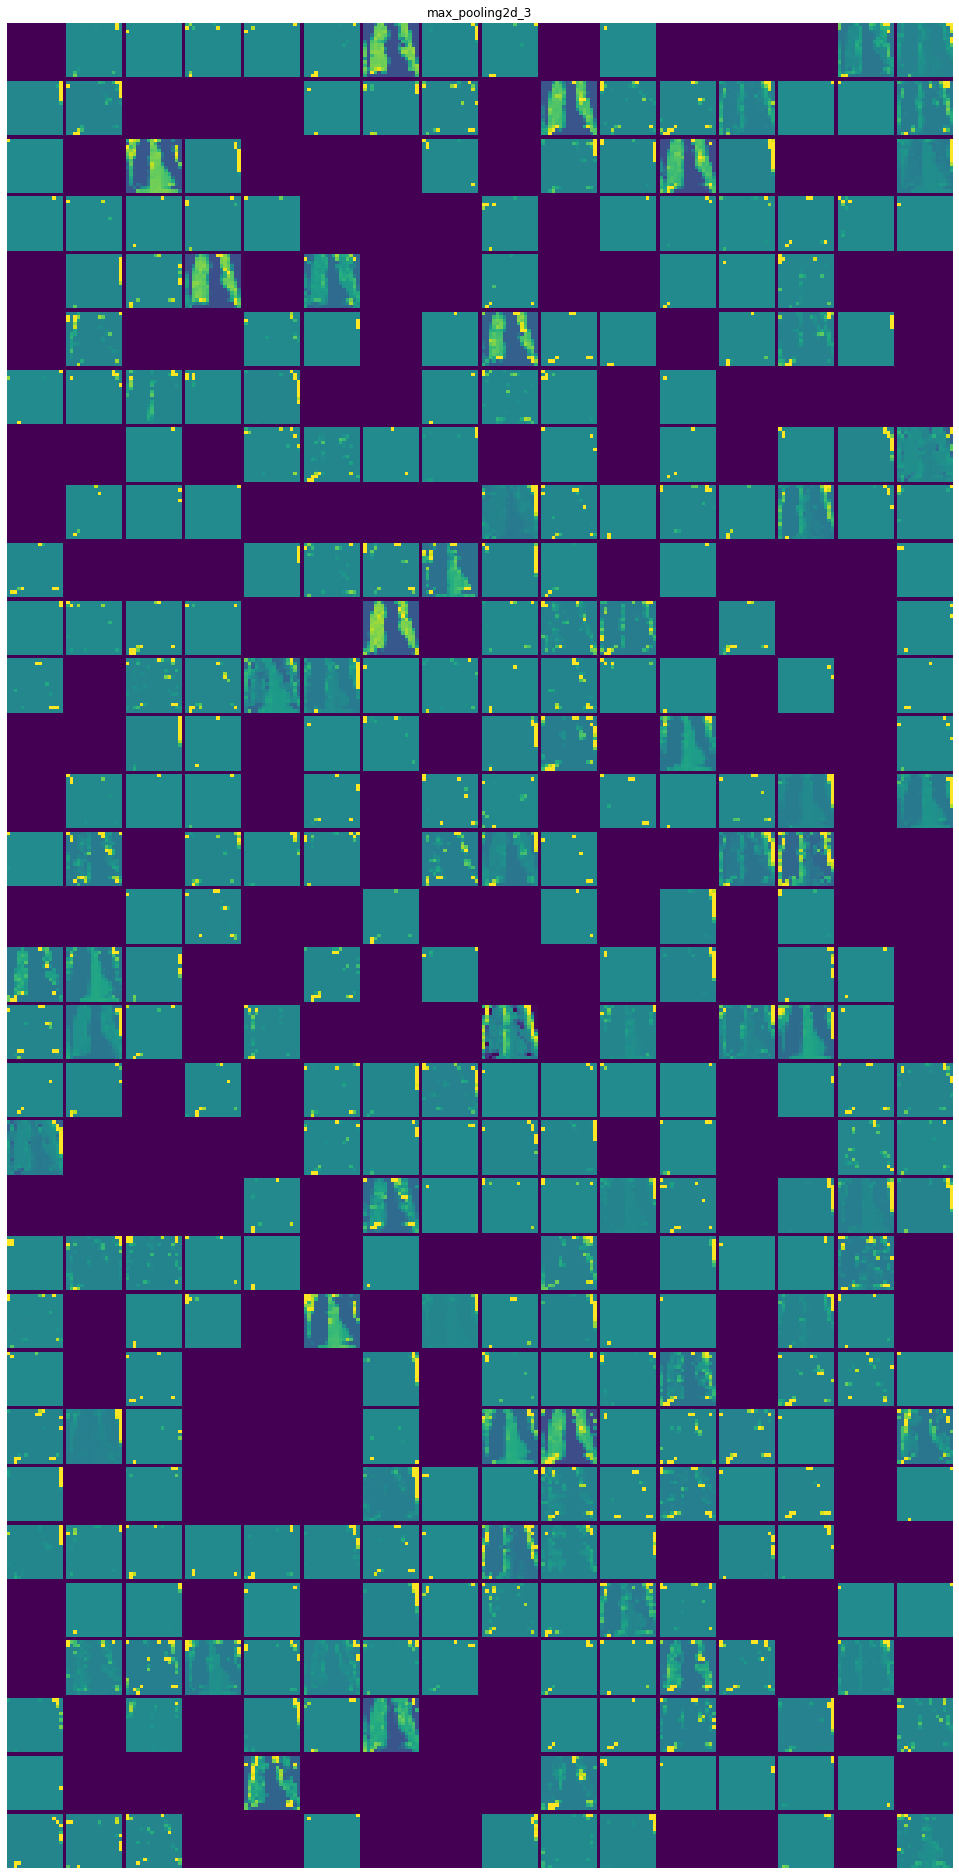

In [45]:
layer_names = []
for layer in cnn_model.layers[:12]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

## Feature Extraction

In [7]:
feature_selector = Sequential()
for layer in cnn_model.layers[:-2]:
    feature_selector.add(layer)

In [ ]:
feature_selector.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 128)     36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 147, 147, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                    

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/train/covid')
covid_train = []
for path in glob.glob('COVID-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    covid_train.append(fs)

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/train/normal')
normal_train = []
for path in glob.glob('Normal-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    normal_train.append(fs)

In [ ]:
train_df_c = pd.DataFrame(covid_train, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
train_df_c['result'] = 1
train_df_n = pd.DataFrame(normal_train, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
train_df_n['result'] = 0
train_df = pd.concat([train_df_c, train_df_n], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/valid/covid')
covid_valid = []
for path in glob.glob('COVID-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    covid_valid.append(fs)

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/valid/normal')
normal_valid = []
for path in glob.glob('Normal-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    normal_valid.append(fs)

In [ ]:
valid_df_c = pd.DataFrame(covid_valid, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
valid_df_c['result'] = 1
valid_df_n = pd.DataFrame(normal_valid, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
valid_df_n['result'] = 0
valid_df = pd.concat([valid_df_c, valid_df_n], ignore_index=True)
valid_df = valid_df.sample(frac=1).reset_index(drop=True)

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/test/covid')
covid_test = []
for path in glob.glob('COVID-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    covid_test.append(fs)

In [ ]:
os.chdir('/content/drive/My Drive/Dataset/data/test/normal')
normal_test= []
for path in glob.glob('Normal-*'):
    img = image.load_img(path, target_size=(299,299,3))
    img_arr = (np.expand_dims(image.img_to_array(img), axis=0))/255.0
    fs = feature_selector.predict(img_arr).tolist()[0]
    normal_test.append(fs)

In [ ]:
test_df_c = pd.DataFrame(covid_test, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
test_df_c['result'] = 1
test_df_n = pd.DataFrame(normal_test, columns=list(map(str,np.linspace(1,64,64,dtype=int))))
test_df_n['result'] = 0
test_df = pd.concat([test_df_c, test_df_n], ignore_index=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
train_df.to_csv('/content/drive/My Drive/Dataset/data/dataframes/train_df.csv', index=False)
valid_df.to_csv('/content/drive/My Drive/Dataset/data/dataframes/valid_df.csv', index=False)
test_df.to_csv('/content/drive/My Drive/Dataset/data/dataframes/test_df.csv', index=False)

In [ ]:
# files.download('/content/drive/My Drive/Dataset/data/dataframes/train_df.csv')
# files.download('/content/drive/My Drive/Dataset/data/dataframes/valid_df.csv')
# files.download('/content/drive/My Drive/Dataset/data/dataframes/test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Machine Learning Models

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Dataset/data/dataframes/train_df.csv')
valid_df = pd.read_csv('/content/drive/My Drive/Dataset/data/dataframes/valid_df.csv')
test_df = pd.read_csv('/content/drive/My Drive/Dataset/data/dataframes/test_df.csv')

In [ ]:
train_df.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,result
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.273885,0.0,0.0,0.0,0.0,0.000000,13.690559,0.0,0.0,0.0,0.0,0.0,0.0,29.662434,22.132536,0.0,0.0,4.076708,0.0,0.0,0.0,17.177250,0.0,0.0,0.0,12.037775,0.000000,0.0,0.0,0.0,4.360051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.826803,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.226400,0.0,0.0,1
1,0.0,0.0,0.0,84.282455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,116.208740,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,45.260952,136.373703,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,54.042297,0.0,0.0,52.143547,0.0,0.0,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,43.235256,0.0,0.0,0.0,0.0,0.0,0.0,71.093323,61.753006,0.0,0.0,62.830414,0.0,0.0,0.0,47.232075,0.0,0.0,0.0,60.357964,73.298683,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,58.985550,49.895393,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,7.109105,0.0,0.0,0.0,0.0,0.0,0.0,15.240572,21.881392,0.0,0.0,0.000000,0.0,0.0,0.0,13.386381,0.0,0.0,0.0,10.601852,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.410851,14.413200,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
4,0.0,0.0,0.0,65.541519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.820919,0.0,0.0,0.0,0.0,28.814291,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,47.033222,51.616280,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,51.621521,0.0,0.0,63.549454,0.0,0.0,0


In [ ]:
X_train = train_df.drop(['result'], axis=1)
y_train = train_df.result
X_val = valid_df.drop(['result'], axis=1)
y_val = valid_df.result
X_test = test_df.drop(['result'], axis=1)
y_test = test_df.result

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, PredefinedSplit
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
np.random.seed(0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
split_index = [-1 if i<5062 else 0 for i in range(6508)]
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

### Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [10,20,30,40,50],
    'max_leaf_nodes': np.arange(2,15,step=1),
    'min_samples_leaf': np.arange(2,6,step=1),
    'max_features': [2,3,4,5]
}
dt_clf = GridSearchCV(dt, param_grid, cv=pds)

dt_clf.fit(X, y)

print(dt_clf.best_params_)
preds = dt_clf.predict(X_test)
print(classification_report(y_test, preds,digits=4,labels=[1,0], target_names=['Covid', 'Normal']))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 2}
              precision    recall  f1-score   support

       Covid     0.9635    0.9475    0.9554       362
      Normal     0.9484    0.9641    0.9562       362

    accuracy                         0.9558       724
   macro avg     0.9559    0.9558    0.9558       724
weighted avg     0.9559    0.9558    0.9558       724



In [ ]:
# with open('data/models/dt_clf.sav', 'wb') as f:
#   pickle.dump(dt_clf, f)

Text(0.5, 1.0, 'Decision Tree')

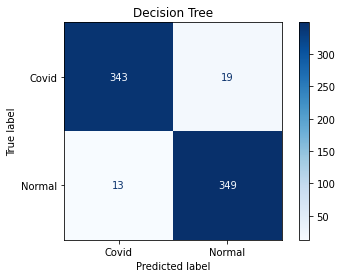

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   y_test, preds, labels=[1,0], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("Decision Tree")

### SVM

In [ ]:
svc = svm.SVC(probability=True,random_state=0)

param_grid = {
    'C':[1,10,100],
    'gamma': [0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'linear']
}
svc_clf = GridSearchCV(svc, param_grid, cv=pds)
svc_clf.fit(X, y)

print(svc_clf.best_params_)
preds = svc_clf.predict(X_test)
print(classification_report(y_test, preds,digits=4,labels=[1,0], target_names=['Covid', 'Normal']))

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

       Covid     0.9670    0.9724    0.9697       362
      Normal     0.9722    0.9669    0.9695       362

    accuracy                         0.9696       724
   macro avg     0.9696    0.9696    0.9696       724
weighted avg     0.9696    0.9696    0.9696       724



In [ ]:
# with open('data/models/svc_clf.sav', 'wb') as f:
#   pickle.dump(svc_clf, f)

Text(0.5, 1.0, 'SVM')

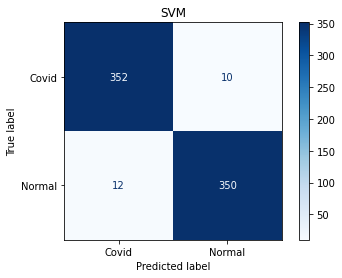

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   y_test, preds, labels=[1,0], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("SVM")

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": [10,20,30],
              "min_samples_split": [5, 10, 20],
              "criterion": ['gini','entropy']}
rf_clf = HalvingGridSearchCV(rf, param_grid, resource='n_estimators', max_resources=100, cv=pds).fit(X, y)
print(rf_clf.best_params_)
preds = rf_clf.predict(X_test)
print(classification_report(y_test, preds,digits=4,labels=[1,0], target_names=['Covid', 'Normal']))

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 99}
              precision    recall  f1-score   support

       Covid     0.9721    0.9613    0.9667       362
      Normal     0.9617    0.9724    0.9670       362

    accuracy                         0.9669       724
   macro avg     0.9669    0.9669    0.9668       724
weighted avg     0.9669    0.9669    0.9668       724



In [ ]:
# with open('data/models/rf_clf.sav', 'wb') as f:
#   pickle.dump(rf_clf, f)

Text(0.5, 1.0, 'Random Forest')

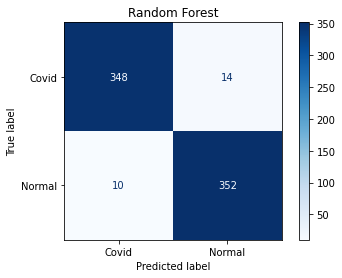

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   y_test, preds, labels=[1,0], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("Random Forest")

### AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=0)

param_grid = {'n_estimators': np.arange(50,100, 10)}
ab_clf = GridSearchCV(ab, param_grid, cv=pds).fit(X, y)

print(ab_clf.best_params_)
preds = ab_clf.predict(X_test)
print(classification_report(y_test, preds,digits=4, labels=[1,0], target_names=['Covid', 'Normal']))

{'n_estimators': 70}
              precision    recall  f1-score   support

       Covid     0.9614    0.9641    0.9628       362
      Normal     0.9640    0.9613    0.9627       362

    accuracy                         0.9627       724
   macro avg     0.9627    0.9627    0.9627       724
weighted avg     0.9627    0.9627    0.9627       724



In [ ]:
# with open('data/models/ab_clf.sav', 'wb') as f:
#   pickle.dump(ab_clf, f)

Text(0.5, 1.0, 'AdaBoost')

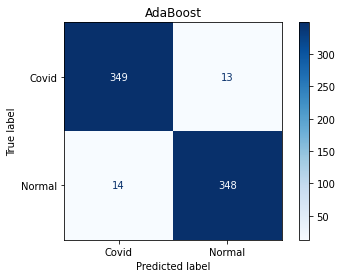

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   y_test, preds, labels=[1,0], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("AdaBoost")

### Ensemble

In [ ]:
vcf = VotingClassifier(estimators=[
        ('dt', tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes=7, min_samples_leaf= 2,max_features=4, random_state=0)), 
        ('rf', RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 20, n_estimators=99, random_state=0)), 
        ('svc', svm.SVC(C= 100, gamma= 0.1, kernel= 'poly',probability=True, random_state=0)), 
        ('ab', AdaBoostClassifier(n_estimators=70, random_state=0))
      ])

params = {'voting':['soft'], 'weights':[[1,4,3,1],[1,3,2,1],[1,3,4,1],[1,3,3,2]]}
vcf_clf = GridSearchCV(vcf, params, cv=pds).fit(X,y)

e_preds = vcf_clf.predict(X_test)

print(classification_report(y_test, e_preds, digits=4, labels=[1,0], target_names=['Covid', 'Normal']))

              precision    recall  f1-score   support

       Covid     0.9751    0.9751    0.9751       362
      Normal     0.9751    0.9751    0.9751       362

    accuracy                         0.9751       724
   macro avg     0.9751    0.9751    0.9751       724
weighted avg     0.9751    0.9751    0.9751       724



In [ ]:
# with open('data/models/vcf_clf.sav', 'wb') as f:
#   pickle.dump(vcf_clf, f)

Text(0.5, 1.0, 'Ensemble')

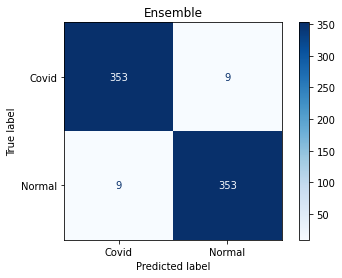

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(
   y_test, e_preds, labels=[1,0], display_labels=['Covid', 'Normal'],cmap=plt.cm.Blues)
plt.title("Ensemble")

In [ ]:
vcf_clf.best_params_

{'voting': 'soft', 'weights': [1, 4, 3, 1]}

In [ ]:
# files.download('/content/drive/My Drive/Dataset/data/models/dt_clf.sav')
# files.download('/content/drive/My Drive/Dataset/data/models/svc_clf.sav')
# files.download('/content/drive/My Drive/Dataset/data/models/rf_clf.sav')
# files.download('/content/drive/My Drive/Dataset/data/models/ab_clf.sav')
# files.download('/content/drive/My Drive/Dataset/data/models/vcf_clf.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>